<a href="https://colab.research.google.com/github/justjstine/CCMACLRL_EXERCISES_COM232/blob/Exercise-1/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns
import re
import os, types

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [ ]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [ ]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [ ]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [14]:
df_train.head(10)

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [15]:
# put your answer here
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [21]:
# put your answer here
print("Missing data in each column:\n" + str(df_train.isnull().sum()))

Missing data in each column:
text     0
label    0
dtype: int64


4. Check for duplicate rows

In [23]:
# put your answer here
df_train.duplicated().sum()

np.int64(0)

5. Check how many rows belong to each class

In [19]:
# put your answer here
df_train['label'].value_counts()


,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [20]:
# put your answer here
df_train.drop_duplicates(inplace=True)

7. Remove rows with NaN values

In [22]:
# put your answer here
df_train.dropna(inplace=True)

8. Convert all text to lowercase, 9. Remove digits, URLS and special characters, 10. Remove stop words, 11. Use Stemming or Lemmatization

In [27]:
def text_clean(text, method, rm_stop):
    text = re.sub(r"\n","",text)   #remove line breaks
    text = text.lower() #convert to lowercase
    text = re.sub(r"\d+","",text)   #remove digits and currencies
    text = re.sub(r'[\$\d+\d+\$]', "", text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   #remove dates
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)   #remove non-ascii
    text = re.sub(r'[^\w\s]','',text)   #remove punctuation
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   #remove hyperlinks

    #remove stop words
    if rm_stop == True:
        filtered_tokens = [word for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
        text = " ".join(filtered_tokens)

    #lemmatization: typically preferred over stemming
    if method == 'L':
        lemmer = WordNetLemmatizer()
        lemm_tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]
        return " ".join(lemm_tokens)

    return text

## C. Training your model

12. Put all text training data in variable **X_train**

In [28]:
# put your answer here
X_train = df_train['text']

13. Put all training data labels in variable **y_train**

In [29]:
# put your answer here
y_train = df_train['label']

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [33]:
# put your answer here
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [40]:
# put your answer here
model = MultinomialNB(alpha=0.1)

16. Train the model using `.fit()`

In [41]:
# put your answer here
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1)

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [42]:
# put your answer here
X_validation = df_validation['text']
X_validation_vectorized = vectorizer.transform(X_validation)
y_validation_pred = model.predict(X_validation_vectorized)


18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [46]:
# put your answer here
y_validation = df_validation['label']
print("Accuracy: " + str(accuracy_score(y_validation, y_validation_pred)))
print("Precision: " + str(precision_score(y_validation, y_validation_pred)))
print("Recall: " + str(recall_score(y_validation, y_validation_pred)))
print("F1-Score: " + str(f1_score(y_validation, y_validation_pred)))

Accuracy: 0.8332142857142857
Precision: 0.8069948186528497
Recall: 0.880565371024735
F1-Score: 0.8421764109496451


19. Create a confusion matrix using the **validation dataset**

[[1087  298]
 [ 169 1246]]


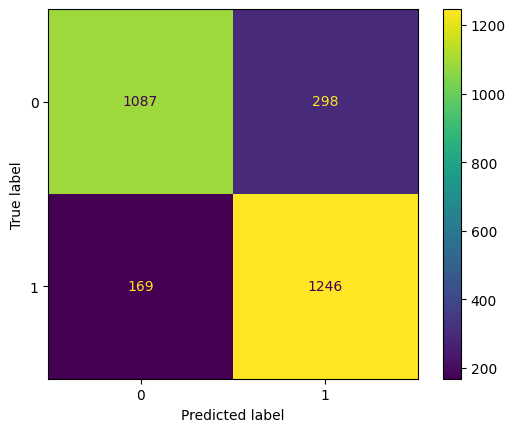

In [48]:
# put your answer here
cm = confusion_matrix(y_validation, y_validation_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [49]:
# put your answer here
X_test = df_test['text']
X_test_vectorized = vectorizer.transform(X_test)
y_test_pred = model.predict(X_test_vectorized)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [50]:
# put your answer here
y_test = df_test['label']
print("Accuracy: " + str(accuracy_score(y_test, y_test_pred)))
print("Precision: " + str(precision_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred)))
print("F1-Score: " + str(f1_score(y_test, y_test_pred)))

Accuracy: 0.8263345195729538
Precision: 0.7993421052631579
Recall: 0.869098712446352
F1-Score: 0.8327621658670322


22. Create a confusion matrix using the **test dataset**

[[1107  305]
 [ 183 1215]]


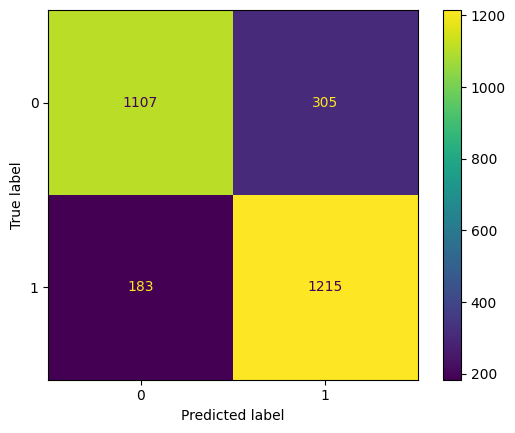

In [51]:
# put your answer here
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [57]:
# put your answer here
test_input = ["I Love you so much."]
test_input_transformed = vectorizer.transform(test_input)
prediction = model.predict(test_input_transformed)
print("Prediction:", prediction[0])

Prediction: 0


24. Test the model by providing a hate speech input. The model should predict it as 1

In [56]:
# put your answer here
test_input = ["I hate you so much! You are disgusting."]
test_input_transformed = vectorizer.transform(test_input)
prediction = model.predict(test_input_transformed)
print("Prediction:", prediction[0])


Prediction: 1
